# Exploring Economic Growth and Life Expectancy

In an era marked by globalization and rapid socio-economic transformations, the interplay between a nation's economic prosperity and the well-being of its citizens is an ever-pertinent topic of study. This data analysis project embarks on a comprehensive exploration of key indicators, focusing on GDP (Gross Domestic Product) and life expectancy, across six diverse countries: Chile, China, Germany, Mexico, the United States of America, and Zimbabwe. Our quest to understand the intricate relationships between economic development and healthcare outcomes has led us to scrutinize these countries and their journey from 2000 to 2015.

#### Project Highlights:

* Data Acquisition and Preprocessing: We initiated our journey by importing libraries, loading data from a comprehensive dataset, and conducting initial data cleaning. The dataset comprises key variables including country, year, life expectancy, and GDP.
* Exploratory Data Analysis: We embarked on a journey of data exploration, visually presenting insights through plots, and highlighting key statistics, enabling an overview of the dataset.
* Individual Country Analysis: Prior to the deep dive into China's data, we conducted individual analyses for each of the six countries, calculating average life expectancy and showcasing how GDP and life expectancy evolved over time for each nation.
* In-Depth Analysis of China: With a focused lens on China, we investigate how its GDP and life expectancy have transformed over the years.

## Step 1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Step 2 - Load Data

In [2]:
#Load Data and First Inspection

df = pd.read_csv("all_data.csv")

## Step 3 - Getting to know the Dataset

In [3]:
#Getting to know a little bit more about the dataset

print(df.head())
df.info()

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Step 4 - Preprocess Data

In [4]:
# Data Cleaning

#Checking Null Values

print(df.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


In [5]:
#Checking Duplicates

print(df.duplicated().sum())

0


In [6]:
#Checking unique countries and years in the dataset

print(df['Country'].unique())
print(df['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [7]:
#Min-Max Scalling for GDP Column

from sklearn.preprocessing import MinMaxScaler

# Create a scaler
scaler = MinMaxScaler()

# Fit the scaler to the GDP data and transform the values
df['GDP_scaled'] = scaler.fit_transform(df[['GDP']])

print(df['GDP_scaled'])

0     0.004059
1     0.003678
2     0.003610
3     0.003936
4     0.005239
        ...   
91    0.000425
92    0.000543
93    0.000610
94    0.000634
95    0.000657
Name: GDP_scaled, Length: 96, dtype: float64


By applying Min-Max scaling to the GDP data, I'm making my analysis more robust and enable a fair comparison of different countries and variables within the project.
The column will be more suitable for comprehensive analysis alongside other variables in the dataset, facilitating easier interpretation and insights into the relationship between GDP and life expectancy, as well as other health-related factors.

In [8]:
# Rename Column

df.rename(columns={'Life expectancy at birth (years)': 'Life_Expectancy'}, inplace=True)

## Step 5 - EDA

In [9]:
df.describe()

,Year,Life_Expectancy,GDP,GDP_scaled
count,96.000000,96.000000,9.600000e+01,96.000000
mean,2007.500000,72.789583,3.880499e+12,0.214200
std,4.633971,10.672882,5.197561e+12,0.287228
min,2000.000000,44.300000,4.415703e+09,0.000000
25%,2003.750000,74.475000,1.733018e+11,0.009333
50%,2007.500000,76.750000,1.280220e+12,0.070504
75%,2011.250000,78.900000,4.067510e+12,0.224535
max,2015.000000,81.000000,1.810000e+13,1.000000


### 5.1.Checking Average Life Expectancy for each Country

In [10]:
print("The Average Life Expectancy for Chile is: " + str(np.mean(df.Life_Expectancy[df.Country == 'Chile'])) + " years old.")

The Average Life Expectancy for Chile is: 78.94375 years old.


In [11]:
print("The Average Life Expectancy for China is: " + str(np.mean(df.Life_Expectancy[df.Country == 'China'])) + " years old.")

The Average Life Expectancy for China is: 74.26249999999999 years old.


In [12]:
print("The Average Life Expectancy for Germany is: " + str(np.mean(df.Life_Expectancy[df.Country == 'Germany'])) + " years old.")

The Average Life Expectancy for Germany is: 79.65625 years old.


In [13]:
print("The Average Life Expectancy for Mexico is: " + str(np.mean(df.Life_Expectancy[df.Country == 'Mexico'])) + " years old.")

The Average Life Expectancy for Mexico is: 75.71875 years old.


In [14]:
print("The Average Life Expectancy for United States is: " + str(np.mean(df.Life_Expectancy[df.Country == 'United States of America'])) + " years old.")

The Average Life Expectancy for United States is: 78.0625 years old.


In [15]:
print("The Average Life Expectancy for Zimbabwe is: " + str(np.mean(df.Life_Expectancy[df.Country == 'Zimbabwe'])) + " years old.")

The Average Life Expectancy for Zimbabwe is: 50.09375 years old.


### 5.2. Plotting GDP and Life Expectancy from Each Country Over the Years

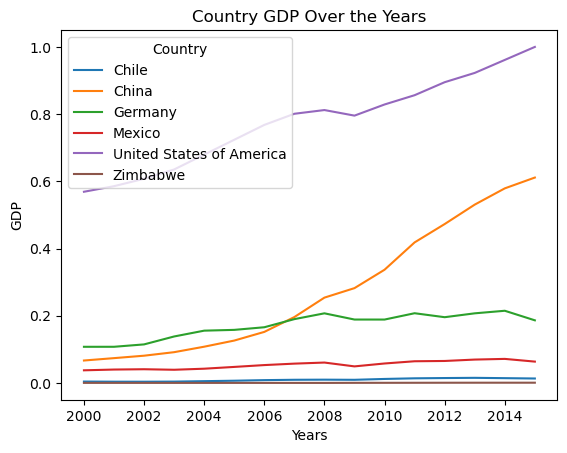

<Figure size 640x480 with 0 Axes>

In [16]:
sns.lineplot(x = "Year", y = "GDP_scaled", hue = "Country", data = df)
plt.title("Country GDP Over the Years")
plt.xlabel("Years")
plt.ylabel("GDP")
plt.show()
plt.clf()

Taking in consideration the line graph above is possible to verify:
* Most of the countires kept a stable GDP;
* Huge incresa in the GDP of China and United States;
* The GDP increase in China made them go over Germany's GDP;
* Zimbabwe if the country with the lower GDP;
* United States is the country with higher GDP.

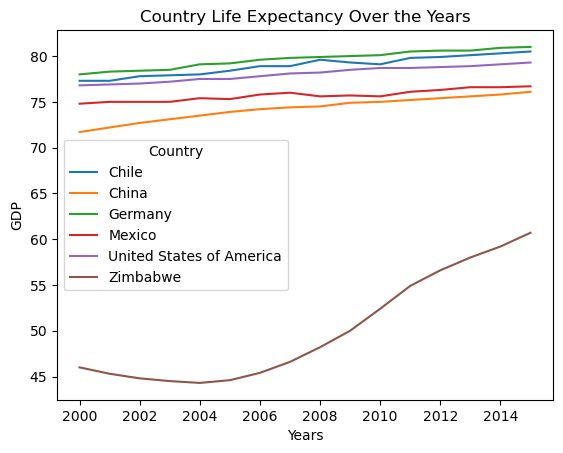

<Figure size 640x480 with 0 Axes>

In [17]:
sns.lineplot(x = "Year", y = "Life_Expectancy", hue = "Country", data = df)
plt.title("Country Life Expectancy Over the Years")
plt.xlabel("Years")
plt.ylabel("GDP")
plt.show()
plt.clf()

The line graph above show us:
* Germany is the country with the highest life expectancy;
* Zimbabwe is the country with the lowest life expectancy. However, the country had a huge increase in it's life expectancy betweem 2000 and 2015;
* It's also possible to verify that there was an increase in the life expectancy of every country from 2000 to 2015.

### 5.3. Average GDP and Life Expectancy Grouped by Country

In [18]:
average_life_expectancy = df.groupby("Country")["Life_Expectancy"].mean()
print(average_life_expectancy)

Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life_Expectancy, dtype: float64


In [19]:
average_GDP = df.groupby("Country")["GDP_scaled"].mean()
print(average_GDP)

Country
Chile                       0.009139
China                       0.273730
Germany                     0.170780
Mexico                      0.053728
United States of America    0.777570
Zimbabwe                    0.000257
Name: GDP_scaled, dtype: float64


## Step 6 - Analyzing a Specific Country

I have chosen China for a more detailed analysis due to its remarkable economic growth and substantial changes in GDP over the years included in the dataframe. China's transformation from an emerging market to a global economic powerhouse has been a subject of immense interest and study. By exploring various aspects of China's data, we can gain a deeper understanding of the factors contributing to its economic and healthcare dynamics.

In [20]:
# Create a dataframe with all data from China

china_df = df[df['Country'] == 'China']

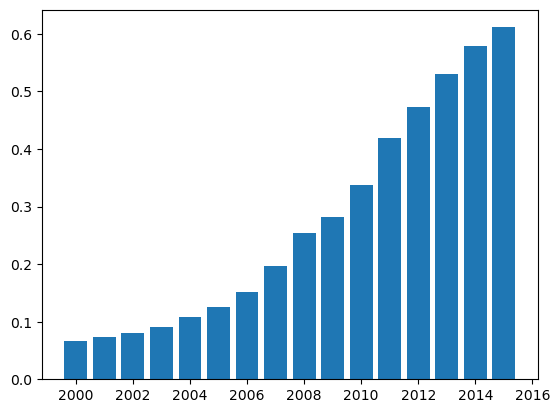

<Figure size 640x480 with 0 Axes>

In [21]:
# Plotting China's GDP over the years

plt.bar(china_df.Year, china_df.GDP_scaled)
plt.show()
plt.clf()

In [22]:
# Difference from the 2000 to 2015 in the GDP

gdp_2015 = china_df["GDP_scaled"].max()
gdp_2000 = china_df["GDP_scaled"].min()

gdp_diff = gdp_2015 - gdp_2000
times_increased_gdp = gdp_2015 / gdp_2000
print(gdp_diff)
print(times_increased_gdp)

0.544516819029969
9.163948959656757


By checking the bar graph above, it is possible to verify that the year 2000 is when China had the lowest GDP and 2015 the highest. Since 2000 to 2015, China had an increase of its GDP of 9.16 times over that period of time.

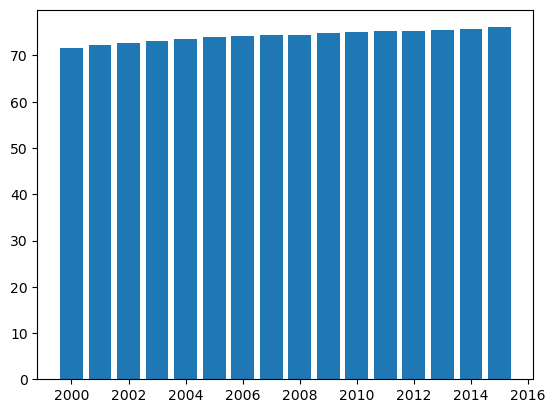

<Figure size 640x480 with 0 Axes>

In [23]:
# Plotting China's Life Expectancy over the years

plt.bar(china_df.Year, china_df.Life_Expectancy)
plt.show()
plt.clf()

In [24]:
# Difference from the 2000 to 2015 in the life expectancy

life_2015 = china_df["Life_Expectancy"].max()
life_2000 = china_df["Life_Expectancy"].min()

life_diff = life_2015 - life_2000
times_increased_life = life_2015 / life_2000
print(life_diff)
print(times_increased_life)

4.3999999999999915
1.0613668061366806


Analyzing the bar graph of China's life expectancy over the year, we can verify that there is an increase of the country's life expectancy of 4.39 years since 2000 to 2015.

### 6.1. Relationship between GDP and Life Expectancy Variables

Examining the potential relationship between GDP and Life Expectancy is a key aspect of this analysis. It is a well-established hypothesis that as a nation's economy grows, there may be improvements in various facets of life, including healthcare. By scrutinizing GDP and Life Expectancy variables, it is possible to explore if there exists a concurrent increase in both these factors over the years. Understanding any correlation between these variables is not only valuable from a statistical perspective but also has profound real-world implications. It can provide insights into the influence of economic development on healthcare and quality of life, as well as guide policymakers in making informed decisions for the well-being of a nation's citizens. Therefore, this analysis seeks to uncover any potential relationships and shed light on the dynamics of economic growth and health outcomes.

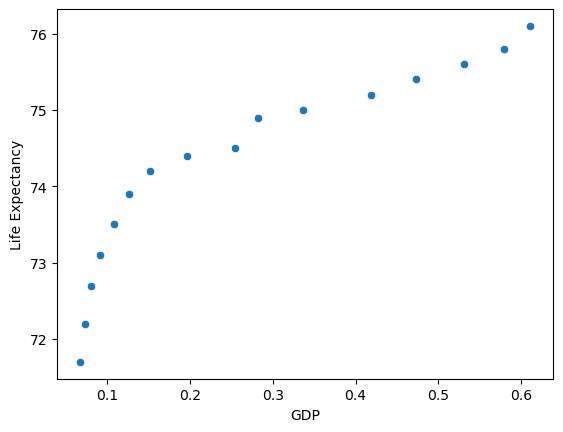

<Figure size 640x480 with 0 Axes>

In [25]:
# Plotting a Scatter Plot to examine a potential relationship between GDP and Life Expectancy

sns.scatterplot(x = "GDP_scaled", y = "Life_Expectancy", data = china_df)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.show()
plt.clf()

### 6.1. Exploring Covariance and Correlation between GDP and Life Expectancy

In [26]:
# Calculating Covariance

cov_gdp_life = np.cov(china_df.GDP_scaled, china_df.Life_Expectancy)
print(cov_gdp_life)

[[0.0374337  0.23168039]
 [0.23168039 1.73716667]]


In [27]:
# Calculating Correlation between variables

from scipy.stats import pearsonr

corr_gdp_life, p = pearsonr(china_df.GDP_scaled, china_df.Life_Expectancy)
print(corr_gdp_life)

0.9085255408648356


Key points on the analysis of Covariance and Corrlation values:
* A Covariance of 0.23 indicates that both GDP and Life Expectancy change together. This value being positive implies that as GDP increase, Life Expectancy tend also to increase;
* The correlation between the two variables is 0.9085 which indicates a strong positive correlation. Also implying that when GDP increases, the Life Expectancy tend to increase aswell;
* Those results also indicates that the huge increase of the GDP over the years had an impact on the increase of the Life Expectancy in China during the same time.

### 6.2. Linear Regression

In [33]:
# Fitting a Linear Regression Model

import statsmodels.api as sm

model = sm.OLS.from_formula('Life_Expectancy ~ GDP_scaled', china_df)
results = model.fit()
print(results.params)

Intercept     72.568364
GDP_scaled     6.189086
dtype: float64


In [34]:
# Getting the intercept and the slope

intercept, slope = results.params['Intercept'], results.params['GDP_scaled']

# Regression Line

regression_line = slope * china_df['GDP_scaled'] + intercept

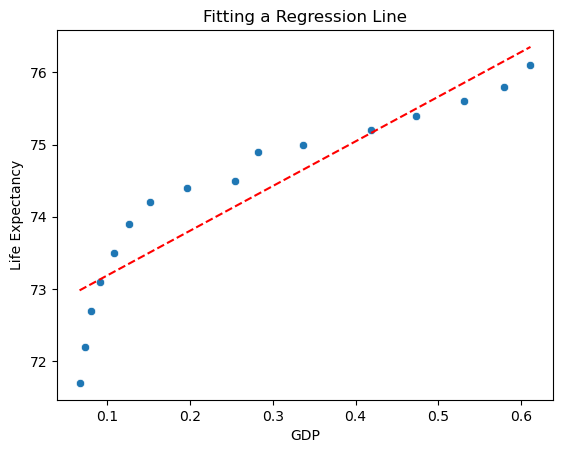

<Figure size 640x480 with 0 Axes>

In [37]:
# Fitting the regression line in the scatter plot

sns.scatterplot(x = "GDP_scaled", y = "Life_Expectancy", data = china_df)
plt.plot(china_df.GDP_scaled, regression_line, color = "red", linestyle = '--')
plt.title("Fitting a Regression Line")
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.show()
plt.clf()

### 6.3. Making some predictions

It is possible to try to predict the life expectancy in China in the next upcoming years if the GDP of the country keeps increasing.
If the GDP keeps increasing with the same rate, we would have for example a GDP of 0.82 in the year 2025, according to our scaled GDP in the dataset.
We will try to predict what would be the life expectancy in China in 2025, using the regression model calculated before.

In [38]:
# Predicting Life Expectancy in 2025

life_expectancy_2025 = slope * 0.82 + intercept
print(life_expectancy_2025)

77.64341402078328


In [39]:
print(life_expectancy_2025 - life_2015)

1.5434140207832883


So, if China's GDP in 2025 increases to 0.82, there would be an increase of 1.54 years in China's Life Expectancy. That would be our prediction.
Of course there are different factors that will affect the increase in the life expectancy of a country, but GDP seems to have some influence overall.

## 7. Step - Suggestions for further studies

While our analysis strongly indicates a significant positive relationship between GDP and Life Expectancy, it is essential to acknowledge the complexity of healthcare dynamics and well-being. Further studies in this domain can explore the multifaceted nature of the interaction between economic prosperity and health outcomes. In addition to GDP, there exist numerous factors that potentially influence Life Expectancy. Socioeconomic disparities, healthcare accessibility, educational attainment, and environmental factors are just a few examples. Understanding the interplay of these factors, both independently and in conjunction with GDP, is pivotal. Future research can delve into the specific mechanisms through which GDP contributes to improved healthcare, be it through healthcare infrastructure investment, social policies, or economic stability. Additionally, cross-country comparative analyses can reveal valuable insights into variations in the GDP-Life Expectancy relationship and identify best practices for promoting healthcare and well-being. By broadening the scope of inquiry, we can develop a comprehensive understanding of how societies can enhance life quality, ultimately improving health and longevity for all.